<a href="https://colab.research.google.com/github/vaibhavSrivastava-pro/AnxietyPredictionModel/blob/master/AnxietyVideoGaming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Required Libraries
from google.colab import data_table
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler #to balance the inconsistency in quantity of data
from sklearn.impute import SimpleImputer #replace NA with mean
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import precision_score, f1_score, recall_score

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving FourthPLess1.csv to FourthPLess1.csv


In [ ]:
df = pd.read_csv('FourthPLess1.csv')
df.head()

,Unnamed: 0,Timestamp,S. No.,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,...,Work,GAD_T,SWL_T,SPIN_T,GAD_spec,SPIN_spec,SWL_spec,isSatisfied,isSP,isAnxiety
0,0,42052.00437,1,0,0,0,0,1,0,0,...,Unemployed / between jobs,1,23,5.0,0,0,2,1,1,0
1,1,42052.00680,2,1,2,2,2,0,1,0,...,Unemployed / between jobs,8,16,33.0,1,2,2,1,1,0
2,2,42052.03860,3,0,2,2,0,0,3,1,...,Employed,8,17,31.0,1,2,2,1,1,0
3,3,42052.06804,4,0,0,0,0,0,0,0,...,Employed,0,17,11.0,0,0,2,1,1,0
4,4,42052.08948,5,2,1,2,2,2,3,2,...,Employed,14,14,13.0,2,0,1,0,0,1


In [ ]:
data_table.enable_dataframe_formatter()
df

,Unnamed: 0,Timestamp,S. No.,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,...,Work,GAD_T,SWL_T,SPIN_T,GAD_spec,SPIN_spec,SWL_spec,isSatisfied,isSP,isAnxiety
0,0,42052.00437,1,0,0,0,0,1,0,0,...,Unemployed / between jobs,1,23,5.0,0,0,2,1,1,0
1,1,42052.00680,2,1,2,2,2,0,1,0,...,Unemployed / between jobs,8,16,33.0,1,2,2,1,1,0
2,2,42052.03860,3,0,2,2,0,0,3,1,...,Employed,8,17,31.0,1,2,2,1,1,0
3,3,42052.06804,4,0,0,0,0,0,0,0,...,Employed,0,17,11.0,0,0,2,1,1,0
4,4,42052.08948,5,2,1,2,2,2,3,2,...,Employed,14,14,13.0,2,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6183,6183,42054.78660,6501,0,0,0,1,1,0,0,...,Student at school,2,28,8.0,0,0,3,1,1,0
6184,6184,42054.78664,6502,0,0,0,0,1,1,0,...,Student at college / university,2,30,3.0,0,0,3,1,1,0
6185,6185,42054.78667,6503,1,0,0,0,0,1,0,...,Student at school,2,23,5.0,0,0,2,1,1,0
6186,6186,42054.78669,6504,1,0,1,1,0,0,0,...,Employed,3,23,NaN,0,0,2,1,1,0


In [ ]:
df = df.drop(columns=['SPIN_T', 'SWL_T', 'SPIN_spec', 'SWL_spec', 'isSatisfied', 'isSP'])

In [ ]:
from sklearn.preprocessing import OneHotEncoder


def one_hot_encoding():
  categorical_features = ['Gender', 'Platform', 'GADE', 'Game', 'whyplay', 'Playstyle', 'Residence', 'Work']
  one_hot = OneHotEncoder(sparse=False, handle_unknown='ignore')

  transformed_X = pd.DataFrame(one_hot.fit_transform(
  df[categorical_features]))

  return transformed_X

transformed_X = one_hot_encoding()
transformed_X

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,453,454,455,456,457,458,459,460,461,462
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6183,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6184,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6185,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6186,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2, random_state=42)
train, test = train_test_split(df, test_size=0.2, random_state=42)


In [ ]:
def scale_dataset(dataframe, undersample=False):

  X = df.iloc[:, :-1].values
  y = df.iloc[:, -1].values

  X = one_hot_encoding()


  if undersample:
    rus = RandomUnderSampler(sampling_strategy=0.5)
    X, y = rus.fit_resample(X, y)


  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [ ]:
train, X_train, y_train = scale_dataset(train, undersample=False)
test, X_test, y_test = scale_dataset(test, undersample=True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


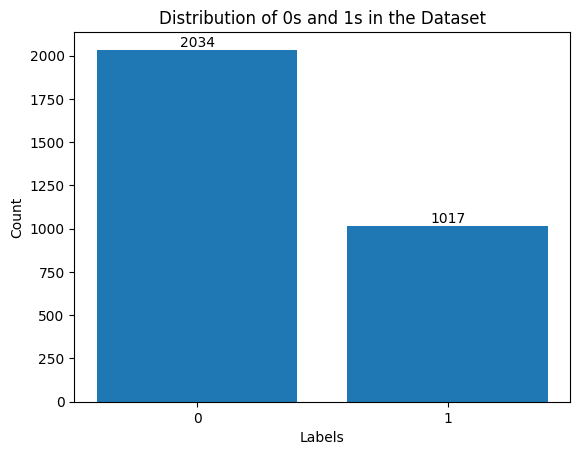

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Call the scale_dataset function and unpack the returned values
data, X, y = scale_dataset(df, undersample=True)  # Replace 'your_dataframe' with your actual DataFrame

# Now you can use the 'data' DataFrame for plotting
label_counts = pd.Series(data[:, -1]).value_counts()

# Create a bar graph
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of 0s and 1s in the Dataset')

# Optionally, add labels to the bars
for i, count in enumerate(label_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Show the graph
plt.xticks(label_counts.index, ['0', '1'])  # Customize the x-axis labels if needed
plt.show()


In [ ]:
def scale_dataset(dataframe, oversample=False):
  X = df.iloc[:, :-1].values
  y = df.iloc[:, -1].values

  X = one_hot_encoding()
  # scaler = StandardScaler()
  # X = scaler.fit_transform(X)

  if oversample:  #oversampling data to fix inconsistency in quantity
    # rus = RandomUnderSampler(sampling_strategy=0.4)
    # X, y = rus.fit_resample(X, y)

    ros = RandomOverSampler(sampling_strategy=0.9)
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))   #stacks horizontally and reshapes y into 2d data(because X is in 2d too)

  return data, X, y

In [ ]:
train, X_train, y_train = scale_dataset(train, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))
print("Recall: {:.2f}".format(recall))

Accuracy: 0.813126709206928
Precision: 0.88
F1 Score: 0.65
Recall: 0.51


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      4506
           1       0.76      0.52      0.62      1017

    accuracy                           0.88      5523
   macro avg       0.83      0.74      0.77      5523
weighted avg       0.87      0.88      0.87      5523



In [ ]:
# Create a Decision Tree Classifier instance
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))
print("Recall: {:.2f}".format(recall))

Accuracy: 0.8896991795806746
Precision: 0.99
F1 Score: 0.80
Recall: 0.68


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2194
           1       0.99      0.68      0.80      1097

    accuracy                           0.89      3291
   macro avg       0.92      0.84      0.86      3291
weighted avg       0.90      0.89      0.88      3291



In [ ]:
# Create a Logistic Regression Classifier instance
clf = LogisticRegression(C=5, max_iter=1000)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))
print("Recall: {:.2f}".format(recall))

Accuracy: 0.7897295654816165
Precision: 0.87
F1 Score: 0.58
Recall: 0.44


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.97      0.86      2034
           1       0.87      0.44      0.59      1017

    accuracy                           0.79      3051
   macro avg       0.82      0.70      0.72      3051
weighted avg       0.81      0.79      0.77      3051



In [ ]:
# Create a Random Forest Classifier instance
clf = RandomForestClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))
print("Recall: {:.2f}".format(recall))


Accuracy: 0.8957763597690671
Precision: 0.97
F1 Score: 0.82
Recall: 0.71


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93      2034
           1       0.96      0.72      0.82      1017

    accuracy                           0.90      3051
   macro avg       0.92      0.85      0.87      3051
weighted avg       0.90      0.90      0.89      3051



In [ ]:
# Create an instance of the Support Vector Machine Classifier (SVC)
clf = SVC(C=5.0)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))
print("Recall: {:.2f}".format(recall))

Accuracy: 0.8140382862351869
Precision: 0.97
F1 Score: 0.82
Recall: 0.71


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      2034
           1       0.91      0.50      0.64      1017

    accuracy                           0.82      3051
   macro avg       0.85      0.74      0.76      3051
weighted avg       0.83      0.82      0.80      3051



In [ ]:
# Create an instance of the XGBoost Classifier
clf = xgb.XGBClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))
print("Recall: {:.2f}".format(recall))

Accuracy: 0.8113035551504102
Precision: 0.97
F1 Score: 0.82
Recall: 0.71


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      2034
           1       0.91      0.51      0.65      1017

    accuracy                           0.82      3051
   macro avg       0.85      0.74      0.76      3051
weighted avg       0.83      0.82      0.80      3051



In [ ]:
from sklearn.cluster import KMeans

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

k=3
# Create an instance of the KMeans class
kmeans = KMeans(n_clusters=k)

# Fit the K-means model to your data
kmeans.fit(transformed_X)

# Add cluster labels to your original DataFrame
df['Cluster'] = kmeans.labels_

# Print the cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))
print("Recall: {:.2f}".format(recall))

Cluster Centers:
[[0.06424345 0.93195266 0.00380389 ... 0.17244294 0.10016906 0.00211327]
 [0.03411608 0.96101019 0.00487373 ... 0.16260523 0.11741249 0.0026584 ]
 [0.04536741 0.95079872 0.00383387 ... 0.1456869  0.085623   0.00127796]]
Accuracy: 0.8113035551504102
Precision: 0.97
F1 Score: 0.82
Recall: 0.71


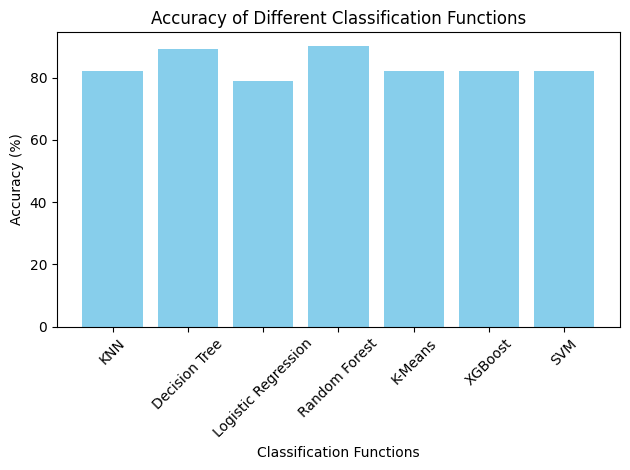

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Replace these with your actual accuracy scores and classification function names
classification_functions = ['KNN', 'Decision Tree', 'Logistic Regression', 'Random Forest', 'K-Means', 'XGBoost', 'SVM']
accuracy_scores = [82, 89, 79, 90, 82, 82, 82]

# Create an array of indices for the x-axis
x = np.arange(len(classification_functions))

# Create the bar graph
plt.bar(x, accuracy_scores, color='skyblue')
plt.xlabel('Classification Functions')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Different Classification Functions')
plt.xticks(x, classification_functions, rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      2034
           1       0.91      0.51      0.65      1017

    accuracy                           0.82      3051
   macro avg       0.85      0.74      0.76      3051
weighted avg       0.83      0.82      0.80      3051

